This tool creates ML models with the given datasets.

In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

Our labels, separated by category.

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']


scalogram_1 = ['up_bytes_1max_y', 'up_bytes_1max_x', 'up_bytes_1min_y', 'up_bytes_1min_x',  
    'up_packet_1max_y', 'up_packet_1max_x', 'up_packet_1min_y', 'up_packet_1min_x', 'down_bytes_1max_y',
    'down_bytes_1max_x',    'down_bytes_1min_y', 'down_bytes_1min_x', 'down_packet_1max_y',
    'down_packet_1max_x', 'down_packet_1min_y', 'down_packet_1min_x']

scalogram_2 = ['up_bytes_2max_y', 'up_bytes_2max_x', 'up_bytes_2min_y', 'up_bytes_2min_x',  
    'up_packet_2max_y', 'up_packet_2max_x', 'up_packet_2min_y', 'up_packet_2min_x', 'down_bytes_2max_y',
    'down_bytes_2max_x',    'down_bytes_2min_y', 'down_bytes_2min_x', 'down_packet_2max_y',
    'down_packet_2max_x','down_packet_2min_y','down_packet_2min_x']

scalogram_3 = ['up_bytes_3max_y', 'up_bytes_3max_x', 'up_bytes_3min_y', 'up_bytes_3min_x',  
    'up_packet_3max_y', 'up_packet_3max_x', 'up_packet_3min_y', 'up_packet_3min_x', 'up_packet_3min_y',
    'down_bytes_3max_y', 'down_packet_3min_y', 'down_bytes_3max_x', 'down_bytes_3min_y',
    'down_bytes_3min_x', 'down_packet_3max_y','down_packet_3max_x','down_packet_3min_y','down_packet_3min_x']
scalogram_4 = ['up_bytes_4max_y', 'up_bytes_4max_x', 'up_bytes_4min_y', 'up_bytes_4min_x',  
    'up_packet_4max_y', 'up_packet_4max_x', 'up_packet_4min_y', 'up_packet_4min_x', 'down_bytes_4max_y',
    'down_bytes_4max_x',    'down_bytes_4min_y', 'down_bytes_4min_x', 'down_packet_4max_y',
    'down_packet_4max_x','down_packet_4min_y','down_packet_4min_x']
scalogram_5 = ['up_bytes_5max_y', 'up_bytes_5max_x', 'up_bytes_5min_y', 'up_bytes_5min_x',  
    'up_packet_5max_y', 'up_packet_5max_x', 'up_packet_5min_y', 'up_packet_5min_x', 'down_bytes_5max_y',
    'down_bytes_5max_x',    'down_bytes_5min_y', 'down_bytes_5min_x', 'down_packet_5max_y',
    'down_packet_5max_x','down_packet_5min_y','down_packet_5min_x']

scalogram = scalogram_1 + scalogram_2 + scalogram_3 + scalogram_4 + scalogram_5

Load the dataset.

In [4]:
base_folder = "csv/"
file_name = 'all_10s_1s_32.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'] + scalogram, inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90', 'up_bytes_silences',
       'up_bytes_silence_mean', 'up_bytes_longest_silence',
       'up_bytes_shortest_silence', 'up_packet_mean', 'up_packet_median',
       'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
       'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75',
       'up_packet_perc90', 'up_packet_silences', 'up_packet_longest_silence',
       'up_packet_shortest_silence', 'down_bytes_mean', 'down_bytes_median',
       'down_bytes_std', 'down_bytes_var', 'down_bytes_skew',
       'down_bytes_kurt', 'down_bytes_perc25', 'down_bytes_perc50',
       'down_bytes_perc75', 'down_bytes_perc90', 'down_bytes_silences',
       'down_bytes_silence_mean', 'down_bytes_longest_silence',
       'down_bytes_shortest_silence', 'down_packet_mean', 'down_packet_median',
 

Choose the labels to consider.

In [5]:

dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'browsing-openvpn', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'

dataset = dataset[dataset['label'] != 'browsing']
#dataset = dataset[dataset['label'] != 'netflix']

dataset['label'].value_counts()

netflix      1746
youtube      1535
acestream     755
twitch        598
Name: label, dtype: int64

In [6]:
dataset['label'].isna().any()

False

Factorize the labels.

In [7]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
dataset['label'].value_counts()

0    1746
1    1535
2     755
3     598
Name: label, dtype: int64

Check correlation matrix.

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
down_packet_perc25             0.393496
down_packet_perc50             0.392862
down_packet_median             0.392862
down_packet_mean               0.378110
down_packet_perc75             0.356091
down_bytes_perc25              0.316750
down_packet_perc90             0.307932
up_packet_perc25               0.303856
up_packet_mean                 0.298110
up_packet_median               0.296725
up_packet_perc50               0.296725
up_packet_perc75               0.284816
down_bytes_median              0.282311
down_bytes_perc50              0.282311
up_packet_perc90               0.275474
down_bytes_mean                0.253619
up_bytes_std                   0.244616
up_bytes_perc90                0.239166
up_packet_std                  0.235177
up_bytes_mean                  0.230662
up_bytes_perc75                0.225249
up_bytes_median                0.205329
up_bytes_perc50                0.205329
down_bytes_perc75              0.205141


Imputer for Nan values.

In [9]:
from sklearn.preprocessing import Imputer
labels = dataset['label']
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

Normalize features (if needed)

In [10]:

from sklearn.preprocessing import StandardScaler
import numpy as np

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']
to_scale = dataset_no_label
scaler = StandardScaler()
scaled = scaler.fit_transform(to_scale)

dataset = pd.DataFrame(scaled)
#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')
dataset['label'] = labels


Apply PCA

In [11]:
#PCA

from sklearn.decomposition import PCA

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

pca = PCA(n_components=40)
main_components = pca.fit_transform(dataset_no_label)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels

dataset['label'].isna().any()


False

Split training and testing set randomly.

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])

In [13]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)
y_train_acestream = (y_train == 3)

In [14]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

import matplotlib.pyplot as plt

def do_test_forest(model):
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]


    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [16]:
def do_test_forest_ovo(model):

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [17]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]

    
    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [18]:
from sklearn.decomposition import PCA

def do_test_knn(model):    
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]

    
    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------


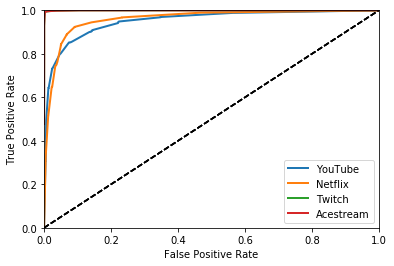

YouTube: 
	CrossValScore: 0.8947682927689012
	RocAucScore:  0.9518726407699829
Netflix: 
	CrossValScore: 0.9142157791214395
	RocAucScore:  0.9605143696876668
Twitch: 
	CrossValScore: 0.9964944842242469
	RocAucScore:  0.9996343499126342
Acestream: 
	CrossValScore: 0.9735636697474799
	RocAucScore:  0.9876392609705809
Multiclass: 
	CrossValScore: 0.90127369244436
[[315  36   0  11]
 [ 40 249   0   9]
 [  0   2 140   0]
 [  9   2   0 114]]

Accuracy train set: 0.990558403021311
Accuracy test set: 0.8824163969795038
-----OvO Classifier Random Forest------
	CrossValScore: 0.8907439696054912
[[324  30   1   7]
 [ 42 251   0   5]
 [  1   0 141   0]
 [ 15   5   0 105]]

Accuracy train set: 0.9873212840571891
Accuracy test set: 0.8856526429341963
-----OvR Classifier Random Forest------
	CrossValScore: 0.8996259699625897
[[297  44   3  18]
 [ 31 260   0   7]
 [  0   0 142   0]
 [  9   2   1 113]]

Accuracy train set: 0.9910979228486647
Accuracy test set: 0.8759439050701187
----------SVM----------

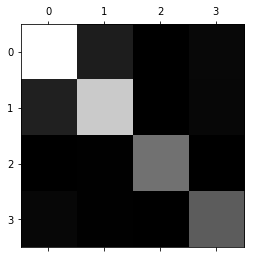

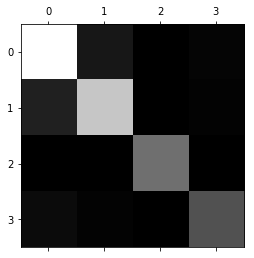

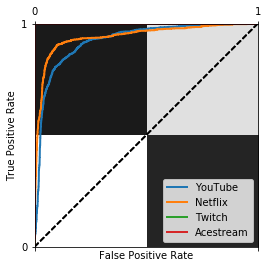

YouTube: 
	CrossValScore: 0.8605435367547358
	RocAucScore:  0.9240069772244881
Netflix: 
	CrossValScore: 0.9047716179791652
	RocAucScore:  0.9419432543799645
Twitch: 
	CrossValScore: 0.9989247311827956
	RocAucScore:  0.9999752191000632
Acestream: 
	CrossValScore: 0.9541449118016374
	RocAucScore:  0.9782673784485926
Multiclass: 
	CrossValScore: 0.861888590093503
[[292  31   0  39]
 [ 63 231   0   4]
 [  0   0 142   0]
 [ 14   1   0 110]]

Accuracy train set: 0.8715942810898301
Accuracy test set: 0.8360302049622438
----------Knn-----------


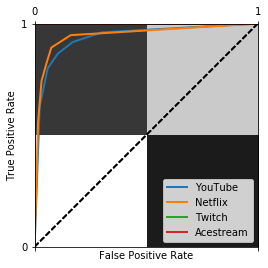

YouTube: 
	CrossValScore: 0.8845459775922343
	RocAucScore:  0.9375847580988308
Netflix: 
	CrossValScore: 0.9053136155022947
	RocAucScore:  0.9468632482269039
Twitch: 
	CrossValScore: 0.9973009319205302
	RocAucScore:  0.9989982189387236
Acestream: 
	CrossValScore: 0.9665453650328878
	RocAucScore:  0.9769638395431208
Multiclass: 
	CrossValScore: 0.8767202812589836
[[310  31   0  21]
 [ 60 235   1   2]
 [  0   0 142   0]
 [ 21   1   0 103]]

Accuracy train set: 0.9063933099541408
Accuracy test set: 0.8522114347357066
-----Neural Network-----


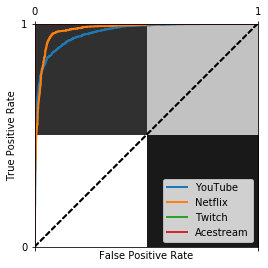

YouTube: 
	CrossValScore: 0.9015337757547129
	RocAucScore:  0.960579708071335
Netflix: 
	CrossValScore: 0.9333649012894296
	RocAucScore:  0.9737643966891296
Twitch: 
	CrossValScore: 0.9994609125254286
	RocAucScore:  0.9999942002149084
Acestream: 
	CrossValScore: 0.9754562744641868
	RocAucScore:  0.9912968839275091
Multiclass: 
	CrossValScore: 0.9045010575233802
[[310  38   0  14]
 [ 26 268   0   4]
 [  1   0 141   0]
 [ 14   2   0 109]]

Accuracy train set: 0.9487456164014028
Accuracy test set: 0.8932038834951457
--------AdaBoost Random Forest--------


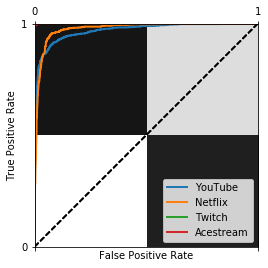

YouTube: 
	CrossValScore: 0.9217640769192809
	RocAucScore:  0.9682967385705648
Netflix: 
	CrossValScore: 0.9333649012894295
	RocAucScore:  0.9770561204952558
Twitch: 
	CrossValScore: 0.9970342923568729
	RocAucScore:  0.9998895404566646
Acestream: 
	CrossValScore: 0.9789588958578612
	RocAucScore:  0.9915949851014787
Multiclass: 
	CrossValScore: 0.9153010705018592
[[323  33   1   5]
 [ 34 260   0   4]
 [  0   0 142   0]
 [ 13   2   1 109]]

Accuracy train set: 0.9870515241435123
Accuracy test set: 0.8996763754045307
---------Decision Tree------


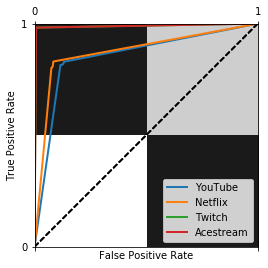

YouTube: 
	CrossValScore: 0.8573002974281124
	RocAucScore:  0.8542292891641513
Netflix: 
	CrossValScore: 0.8869629197931085
	RocAucScore:  0.8754242502593778
Twitch: 
	CrossValScore: 0.9919042527441798
	RocAucScore:  0.9879572735104833
Acestream: 
	CrossValScore: 0.9641201979303015
	RocAucScore:  0.9153614934345831
Multiclass: 
	CrossValScore: 0.8546398830125878
[[295  51   2  14]
 [ 48 239   0  11]
 [  1   1 138   2]
 [ 12   5   3 105]]

Accuracy train set: 0.9932560021580793
Accuracy test set: 0.8381877022653722
--------AdaBoost Decision Tree--------


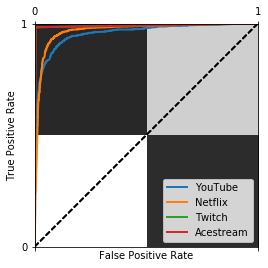

YouTube: 
	CrossValScore: 0.8985753295248122
	RocAucScore:  0.9561942151742191
Netflix: 
	CrossValScore: 0.925279376411452
	RocAucScore:  0.9683155014580789
Twitch: 
	CrossValScore: 0.992983152267997
	RocAucScore:  0.9895809497095363
Acestream: 
	CrossValScore: 0.9638564566653429
	RocAucScore:  0.9156455393996923
Multiclass: 
	CrossValScore: 0.9101891533412798
[[317  37   2   6]
 [ 35 259   0   4]
 [  1   0 141   0]
 [ 14   2   1 108]]

Accuracy train set: 0.9932560021580793
Accuracy test set: 0.889967637540453


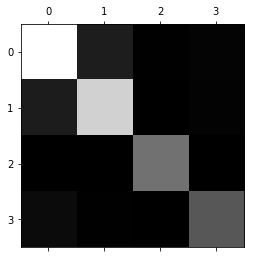

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(random_state=14)

do_test_forest(rf)

print("-----OvO Classifier Random Forest------")

rf = OneVsOneClassifier(rf)
do_test_forest_ovo(rf)

print("-----OvR Classifier Random Forest------")

rf = OneVsRestClassifier(rf)
do_test_forest_ovo(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)


print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_knn(knn)

print("-----Neural Network-----")
nn = MLPClassifier(max_iter=1000)
do_test_knn(nn)


print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

